<a href="https://colab.research.google.com/github/dae9999nam/COMP3314/blob/main/COMP3314_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this course, we are going to learn three different learning.

* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning


In [ ]:
# 1. Dataset Loading

import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.head()




,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


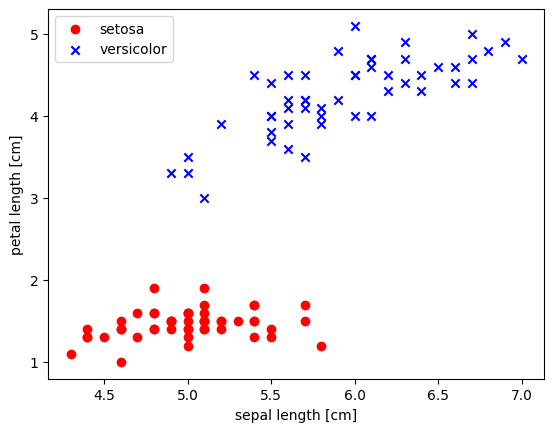

In [ ]:
#Iris Dataset - Preprocessing and Plotting
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

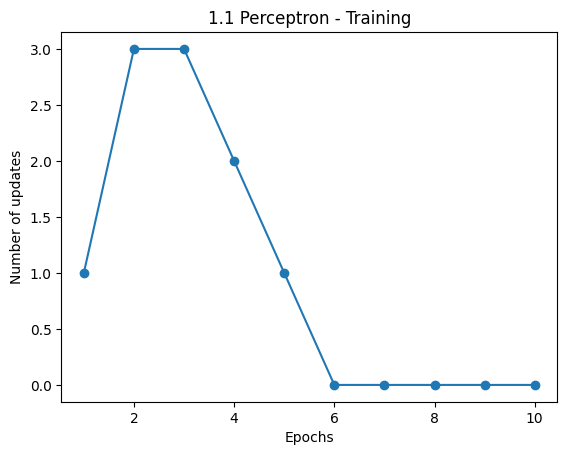

<ipython-input-15-79467ebd5626>:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


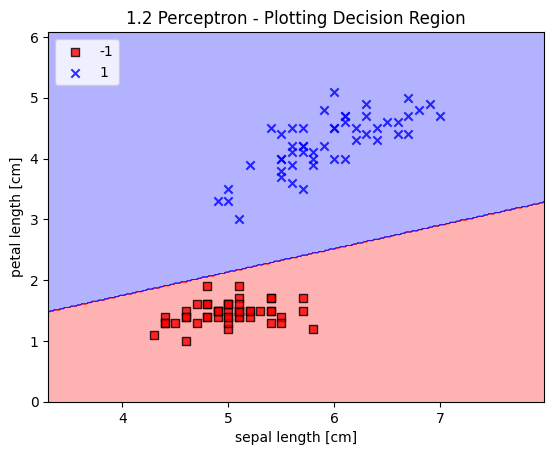

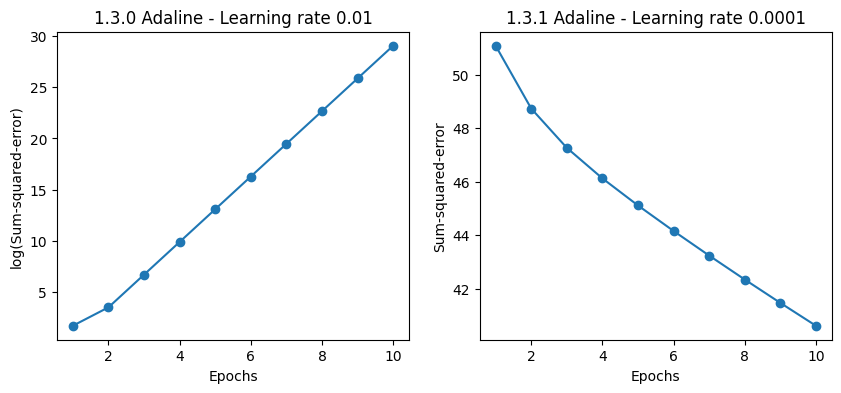

In [ ]:
#Perceptron - Implementation
import numpy as np

class Perceptron(object):
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

# Perceptron - Training

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('1.1 Perceptron - Training')
plt.show()

#Perceptron - Plotting Decision Region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,
                c = colors[idx], marker = markers[idx],
                label = cl, edgecolor = 'black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('1.2 Perceptron - Plotting Decision Region')
plt.legend(loc='upper left')
plt.show()

#Adaline - Implementation
class AdalineGD(object):
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1,len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('1.3.0 Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('1.3.1 Adaline - Learning rate 0.0001')
plt.show()

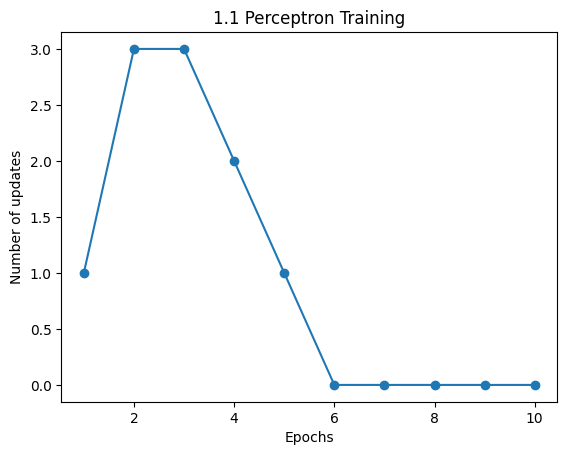

In [ ]:
# Perceptron - Training

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('1.1 Perceptron Training')
plt.show()

<ipython-input-26-e73126421d23>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


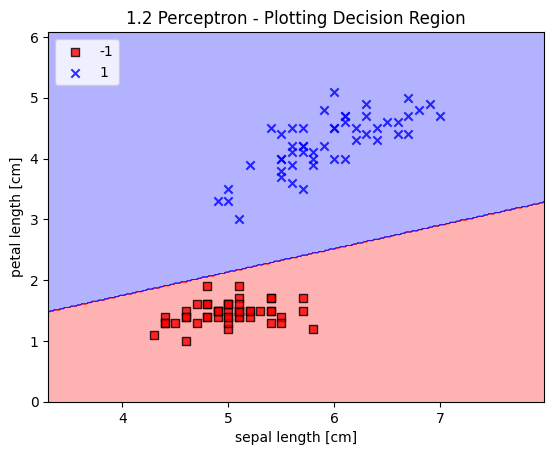

In [ ]:
#Perceptron - Plotting Decision Region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,
                c = colors[idx], marker = markers[idx],
                label = cl, edgecolor = 'black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('1.2 Perceptron - Plotting Decision Region')
plt.legend(loc='upper left')
plt.show()

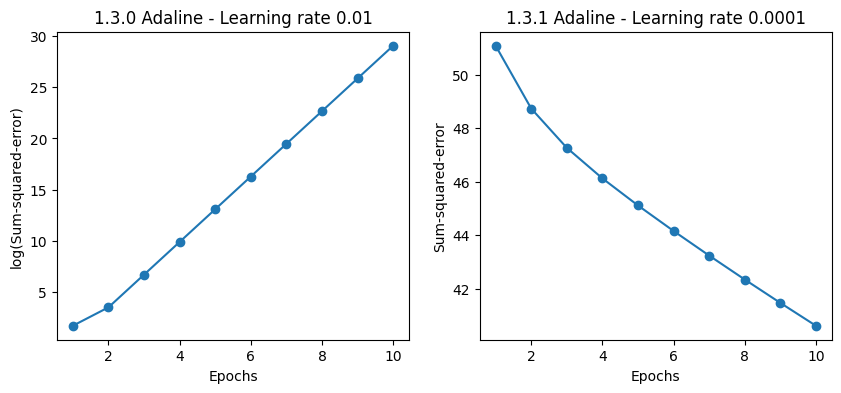

In [ ]:
#Adaline - Implementation
class AdalineGD(object):
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
adal = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1,len(adal.cost_) + 1), np.log10(adal.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('1.3.0 Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('1.3.1 Adaline - Learning rate 0.0001')
plt.show()

<ipython-input-18-e73126421d23>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


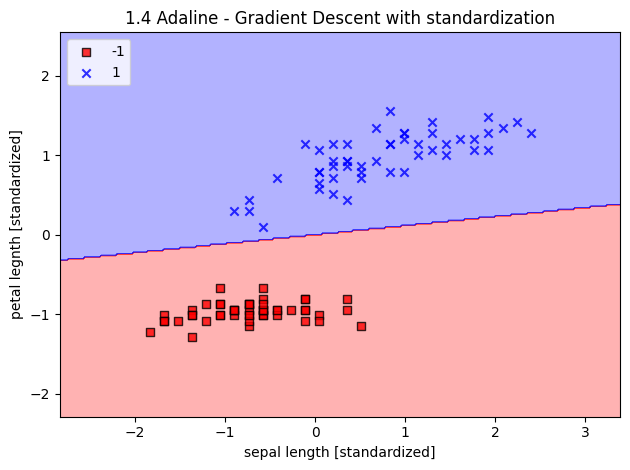

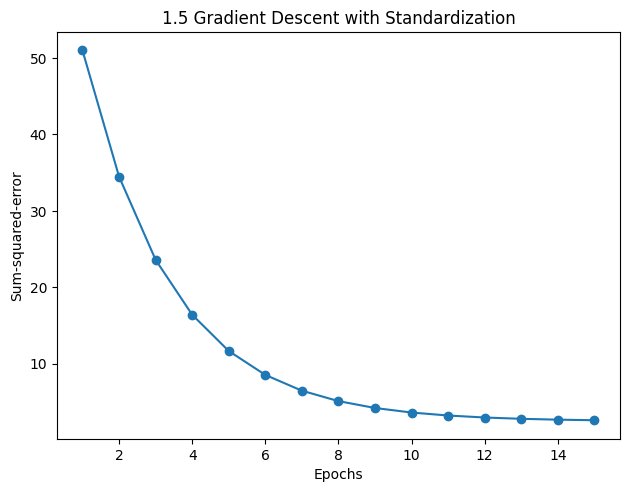

In [ ]:
#Standardization
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()


ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('1.4 Adaline - Gradient Descent with standardization')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal legnth [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.title('1.5 Gradient Descent with Standardization')
plt.show()

<ipython-input-26-e73126421d23>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


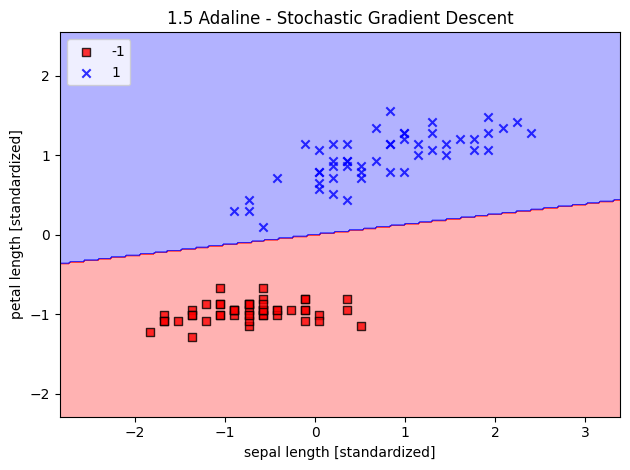

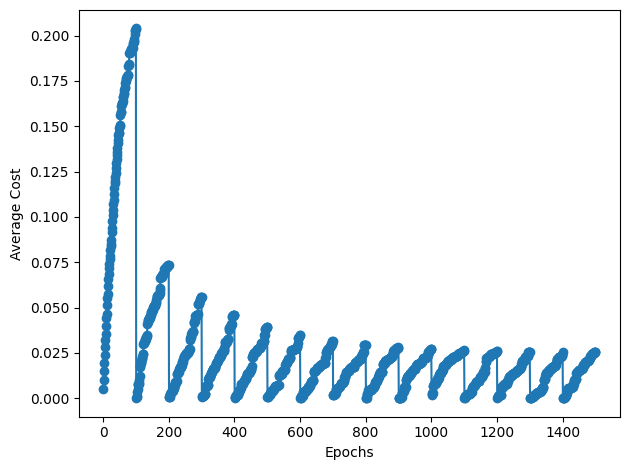

In [ ]:
#Mini Batch Learning
class AdalineSGD(object):
  def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    self._initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter): # for iteration
      if self.shuffle:
        X, y = self._shuffle(X, y)
        cost = []
        for xi, target in zip(X, y): # for training samples
          cost.append(self._update_weights(xi,target))
          avg_cost = sum(cost) / len(y)
          self.cost_.append(avg_cost)
    return self
 # for online learning, update weight with new training sample
  def partial_fit(self, X, y):
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
# check if case of newly arrived sample is more than one or not
    if y.ravel().shape[0] > 1 : #y.ravel() == flatten operation
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X,y)
    return self

  def _shuffle(self, X, y):
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def _initialize_weights(self,m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    output = self.activation(self.net_input(xi)) # xi == current sample, activation function is linear activation function
    error = (target - output) # target is binary, output is continuous value, output is different to perceptron, binary
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2 #0.5 for cancel out 2 from derivatives
    return cost # for single traning sample. No need for overall cost

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

ada = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('1.5 Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

In [ ]:
#Scikit-learn Libaray

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

import numpy as np
print('Class labels:', np.unique(y))

#Traning and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
#test_size = 30% of total data set
#dataset is sorted by label --> if we just cut the dataset into portion, training will not be done well due to biased dataset
# therefore we need stratify so that both training and testing data have same proportion of sample label

## Note that train_test_split function shuffles the training sets internally and performs stratification before splitting

print('Labels counts in y:', np.bincount(y))
print('Lables counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) #mean and standard deviation fro individual data
X_train_std = sc.transform(X_train) #apply above parameters to original data
X_test_std = sc.transform(X_test)



Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Lables counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [ ]:
#training
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_train_std)
print('Misclassified training samples:', (y_train != y_pred).sum()) #.sum() result shows count the number of sample not same

#Testing
y_pred = ppn.predict(X_test_std)
print('Misclassified samples:', (y_test != y_pred).sum())

#Testing - Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy using accuracy_score(): %.3f' % accuracy_score(y_test, y_pred))

#Alternatively
print('Accuracy using .score(): %.3f ' %ppn.score(X_test_std, y_test))

Misclassified training samples: 6
Misclassified samples: 1
Accuracy using accuracy_score(): 0.978
Accuracy using .score(): 0.978 


<ipython-input-46-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


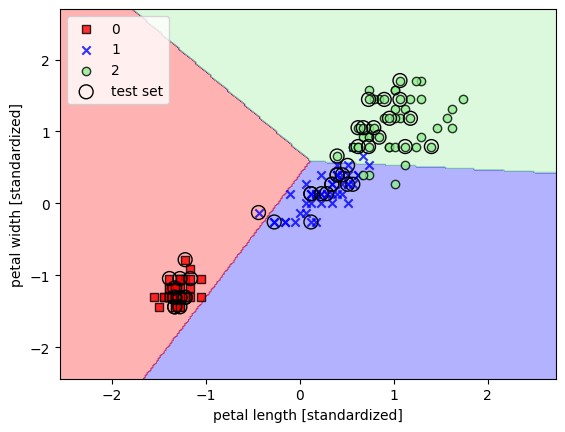

In [ ]:
#Decision Regions Plotting

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,
                c = colors[idx], marker = markers[idx],
                label = cl, edgecolor = 'black')
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                alpha=1.0, linewidth = 1, marker = 'o', s=100, label = 'test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Chapter 2 Logistic Regression, SVM, Decision Tree, KNN

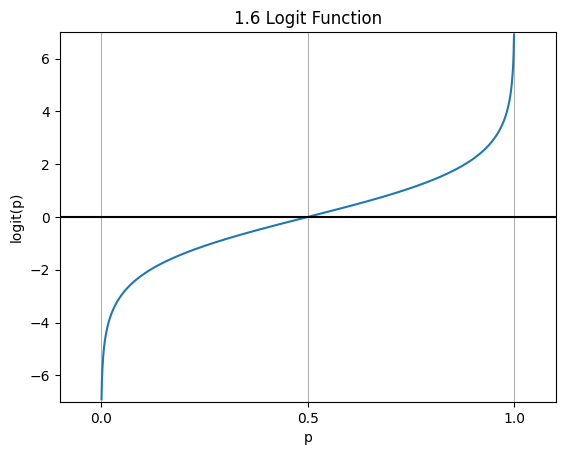

In [ ]:
#Logit function

import matplotlib.pyplot as plt
import numpy as np
def logit(p):
    return np.log(p/(1-p))
p = np.arange(0.001, 1, 0.001)
lp = logit(p)
plt.plot(p, lp)
plt.axhline(0, color='k')
plt.xlim(-0.1, 1.1)
plt.ylim(-7,7)
plt.title('1.6 Logit Function')
plt.xlabel('p')
plt.ylabel('logit(p)')
plt.xticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.xaxis.grid(True)
plt.show()

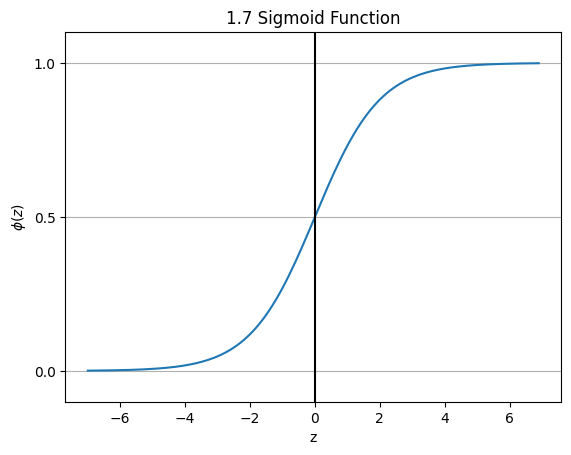

In [3]:
# Inverse of Logit (Sigmoid) Function
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.title('1.7 Sigmoid Function')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()



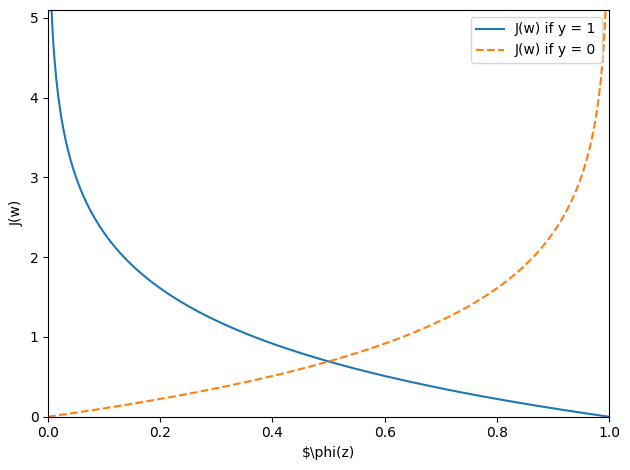

In [2]:
#Plotting our new J
def cost_1(z):
  return -np.log(sigmoid(z))

def cost_0(z):
  return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'J(w) if y = 1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label = 'J(w) if y = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()